In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)  # LaTeX fonts for plots

In [7]:
dados = pd.DataFrame({"Dataset":["HST-KP","SH0ES09","SH0ES11","CHP12","SH0ES16","SH0ES18","SH0ES19","SH0ES21","SH0ES22",
                                 "WMAP1","WMAP3","WMAP5","WMAP7","WMAP9","Planck13","Planck15","Planck18","ACT20"],
                     "H0":[72.0,74.2,73.08,74.3,73.24,73.48,74.03,73.20,73.04,72.0,73.2,71.9,70.4,69.32,67.3,67.8,67.36,67.9],
                     "Erro":[8.0,3.6,2.4,2.1,1.74,1.66,1.42,1.3,1.04,5.0,3.15,2.65,2.5,0.80,1.20,0.90,0.54,1.5],
                     "Ano":[2001,2009,2011,2012,2016,2018,2019,2021,2022,2003,2007,2009,2011,2013,2014,2016,2018,2020],
                     })

In [8]:
data = [
    (1, 2020, 67.27, 0.60,0.60, 'Planck18', 'Aghanim et al.', 'Aghanim_2020'),
    (2, 2020, 73.50, 5.30,5.30, 'lens', 'Baxter et al.', 'Baxter_2020'),
    (3, 2020, 67.36, 0.54,0.54, 'Planck18+lens', 'Aghanim et al.', 'Aghanim_2020'),
    (4, 2020, 67.90, 1.50,1.50, 'ACT20', 'Aiola et al.', 'Aiola_2020'),
    (5, 2020, 67.60, 1.10,1.10, 'ACT20+WMAP9', 'Aiola et al.', 'Aiola_2020'),
    (6, 2021, 68.80, 1.50,1.50, 'SPT18', 'Dutcher et al.', 'Dutcher_2021'),
    (7, 2021, 67.49, 0.53,0.53, 'Planck18+SPT18+ACT20', 'Balkenhol et al.', 'Balkenhol_2021'),
    (8, 2020, 68.50, 2.20,2.20, 'BOSS DDR12+BBN', 'D’Amico et al.', 'D_Amico_2020'),
    (9, 2020, 67.90, 1.10,1.10, 'BOSS+BBN', 'Ivanov et al.', 'Ivanov_2020'),
    (10, 2020, 69.60, 1.80,1.80, 'eBOSS+Planck18', 'Pogosian et al.', 'Pogosian_2020'),
    (11, 2021, 67.35, 0.97,0.97, 'BOSS+eBOSS+BBN', 'Alam et al.', 'Alam_2021'),
    (12, 2021, 65.6, 3.4,5.5, 'BOSS DR12+BAO', 'Philcox et al.', 'Philcox_2021'),
    (13, 2021, 70.6, 3.7,5.0, 'BOSS DR12+BAO+lens', 'Philcox et al.', 'Philcox_2021'),
    (14, 2022, 69.6, 4.1,5.4, 'BOSS+BBN', 'Philcox et al.', 'Philcox_2022'),
    (15, 2022, 65.0, 3.9,4.3, 'BOSS+BBN+lens', 'Philcox et al.', 'Philcox_2022'),
    (16, 2023, 67.65, 0.44,0.44, 'Planck18+BAO', 'Bernui et al.', 'Bernui_2023'),
    (17, 2023, 67.60, 0.43,0.43, 'Planck18+BAO+lens', 'Bernui et al.', 'Bernui_2023'),
    (18, 2024, 68.30, 1.10,1.10, 'ACT20+BAO+BBN', 'Madhavacheril et al.', 'Madhavacheril_2024'),
    (19, 2024, 68.10, 1.00,1.00, 'ACT20+BAO+BBN+Planck18', 'Madhavacheril et al.', 'Madhavacheril_2024'),
    (20, 2024, 68.53, 0.80,0.80, 'DESI+BBN', 'Adame et al.', 'Adame_2024'),
    (21, 2024, 68.52, 0.62,0.62, 'DESI+BBN+$\theta_*$', 'Adame et al.', 'Adame_2024'),
    (22, 2024, 67.97, 0.38,0.38, 'DESI+ACT20+Planck18+lens', 'Adame et al.', 'Adame_2024'),
    (23, 2020, 75.10, 3.80,3.80, 'Tully-Fisher relation', 'Schombert et al.', 'Schombert_2020'),
    (24, 2020, 73.90, 3.00,3.00, 'Maser', 'Pesce et al.', 'Pesce_2020'),
    (25, 2020, 69.60, 2.50, 2.50, 'TRGB+SNe Ia', 'Freedman et al.', 'Freedman_2020'),
    (26, 2020, 74.20, 1.60,1.60, 'Gravitational lens', 'Millon et al.', 'Millon_2020'),
    (27, 2020, 75.8, 5.2,4.9, 'SNe II', 'de Jaeger et al.', 'de_Jaeger_2020'),
    (28, 2021, 72.10, 2.00,2.00, 'TRGB+SNe Ia', 'Soltis et al.', 'Soltis_2021'),
    (29, 2021, 71.50, 1.80,1.80, 'TRGB+SNe Ia', 'Anand et al.', 'Anand_2022'),
    (30, 2021, 68.0, 12.0,8.0, 'GWTC-3', 'Abbott et al.', 'Abbott_2023'),
    (31, 2021, 73.60, 1.70,1.70, 'Gravitational lens', 'Qi et al.', 'Qi_2021'),
    (32, 2021, 70.50, 5.75,5.75, 'SBF+SNe Ia', 'Khetan et al.', 'Khetan_2021'),
    (33, 2021, 73.30, 3.10,3.10, 'SBF+SNe Ia', 'Blakeslee et al.', 'Blakeslee_2021'),
    (34, 2021, 74.30, 1.45,1.45, 'Cepheids+SNe Ia', 'Camarena and Marra', 'Camarena_2021'),
    (35, 2021, 73.20, 1.30,1.30, 'Cepheids+SNe Ia', 'Riess et al.', 'Riess_2021'),
    (36, 2022, 73.04, 1.04,1.04, 'Cepheids+SNe Ia', 'Riess et al.', 'Riess_2022'),
    (37, 2022, 72.53, 0.99,0.99, 'Cepheids+TRGB+SNe Ia', 'Riess et al.', 'Riess_2022'),
    (38, 2022, 73.20, 1.30,1.30, 'Cepheids+SNe Ia', 'Mörtsell et al.', 'Mortsell_2022'),
    (39, 2022, 76.70, 2.00,2.00, 'Cepheids', 'Mörtsell et al.', 'Mortsell_2022'),
    (40, 2022, 76.94, 6.40,6.40, 'TRGB+SNe Ia', 'Dhawan et al.', 'Dhawan_2022'),
    (41, 2022, 75.4, 3.8,3.7, 'SNe II', 'de Jaeger et al.', 'de_Jaeger_2022'),
    (42, 2022, 62.30, 9.10,9.10, 'FRB', 'Hagstotz et al.', 'Hagstotz_2022'),
    (43, 2022, 75.50, 2.50,2.50, 'Tully-Fisher relation', 'Kourkchi et al.', 'Kourkchi_2022'),
    (44, 2022, 67.0, 6.3,3.8, 'GW170817+GWTC–3', 'Mukherjee et al.', 'Mukherjee_2022'),
    (45, 2023, 71.00, 3.00,3.00, 'FRB', 'Liu et al.', 'Liu_2023'),
    (46, 2023, 74.60, 0.80,0.80, 'Tully-Fisher relation', 'Tully et al.', 'Tully_2023_2'),
    (47, 2023, 74.20, 1.60,1.60, 'Quasar lens', 'Shajib et al.', 'Shajib_2023'),
    (48, 2024, 72.37, 2.97,2.97, 'Miras-SNe Ia', 'Huang et al.', 'Huang_2024'),
]

# Colunas do DataFrame
columns = ['Nº','Year', '$H_0$','+Erro','-Erro', 'Methods', 'Authors', 'Ref.']

# Criando DataFrame
df = pd.DataFrame(data, columns=columns)

df=df[['Year','$H_0$','+Erro', '-Erro', 'Methods', 'Authors']]
df.to_csv('H0data.csv', index=False)

In [9]:
df

,Year,$H_0$,+Erro,-Erro,Methods,Authors
0,2020,67.27,0.60,0.60,Planck18,Aghanim et al.
1,2020,73.50,5.30,5.30,lens,Baxter et al.
2,2020,67.36,0.54,0.54,Planck18+lens,Aghanim et al.
3,2020,67.90,1.50,1.50,ACT20,Aiola et al.
4,2020,67.60,1.10,1.10,ACT20+WMAP9,Aiola et al.
5,2021,68.80,1.50,1.50,SPT18,Dutcher et al.
6,2021,67.49,0.53,0.53,Planck18+SPT18+ACT20,Balkenhol et al.
7,2020,68.50,2.20,2.20,BOSS DDR12+BBN,D’Amico et al.
8,2020,67.90,1.10,1.10,BOSS+BBN,Ivanov et al.
9,2020,69.60,1.80,1.80,eBOSS+Planck18,Pogosian et al.


# $H_0$ per year

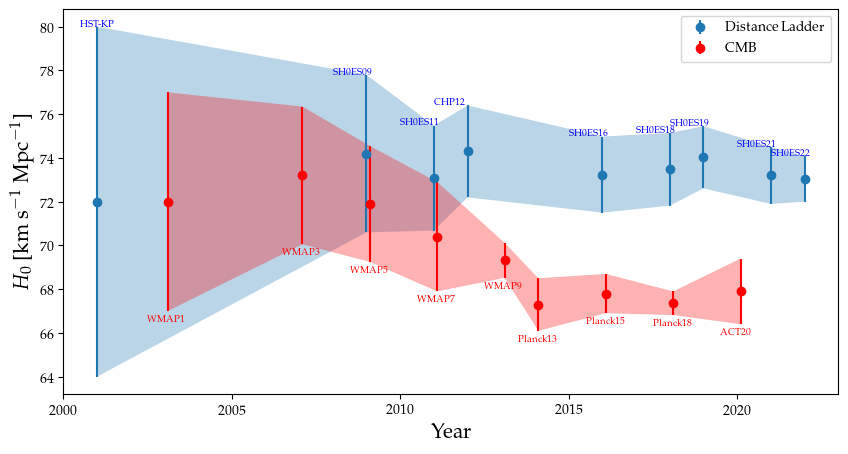

In [14]:
y=dados["H0"].iloc[:9]
Y=dados["H0"].iloc[9:]
x=dados["Ano"].iloc[:9]
X=dados["Ano"].iloc[9:]
yerr=dados["Erro"].iloc[:9]
Yerr=dados["Erro"].iloc[9:]
y1 = y - yerr
y2 = y + yerr
Y1 = Y - Yerr
Y2 = Y + Yerr
"""plot"""

import matplotlib.axes  as ax
#from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=False) # para fazer o grafico com letra de LaTex

fig,ax=plt.subplots(figsize=(10,5))
#plt.figure(figsize=(30,15))
plt.errorbar(x,y,yerr=yerr,fmt="o",xlolims=True,label="Distance Ladder")
plt.fill_between(x,y1,y2 ,alpha=0.3)
plt.errorbar(X+0.1,Y,yerr=Yerr,fmt="o",xlolims=True,label="CMB",color="red")
plt.fill_between(X+0.1,Y1,Y2 ,alpha=0.3,facecolor="red")
plt.ylabel("$H_0$ [km s$^{-1}$ Mpc$^{-1}$]",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.xlim(2000,2023)
ax.annotate(dados["Dataset"].iloc[0],xy=(dados["Ano"].iloc[0] -0.5 ,dados["H0"].iloc[0] + dados["Erro"].iloc[0]),fontsize=7,color="blue")
for j in np.arange(9,18):
  ax.annotate(dados["Dataset"].iloc[j],xy=(dados["Ano"].iloc[j] - 0.5,dados["H0"].iloc[j]+
  - dados["Erro"].iloc[j] - 0.5),fontsize=7,color="red")
for i in np.arange(1,9):
  ax.annotate(dados["Dataset"].iloc[i],xy=(dados["Ano"].iloc[i] -1 ,dados["H0"].iloc[i] + dados["Erro"].iloc[i]),fontsize=7,color="blue")

plt.legend()
#plt.savefig("h.pdf")
plt.show()

# $H_0$ Measurements

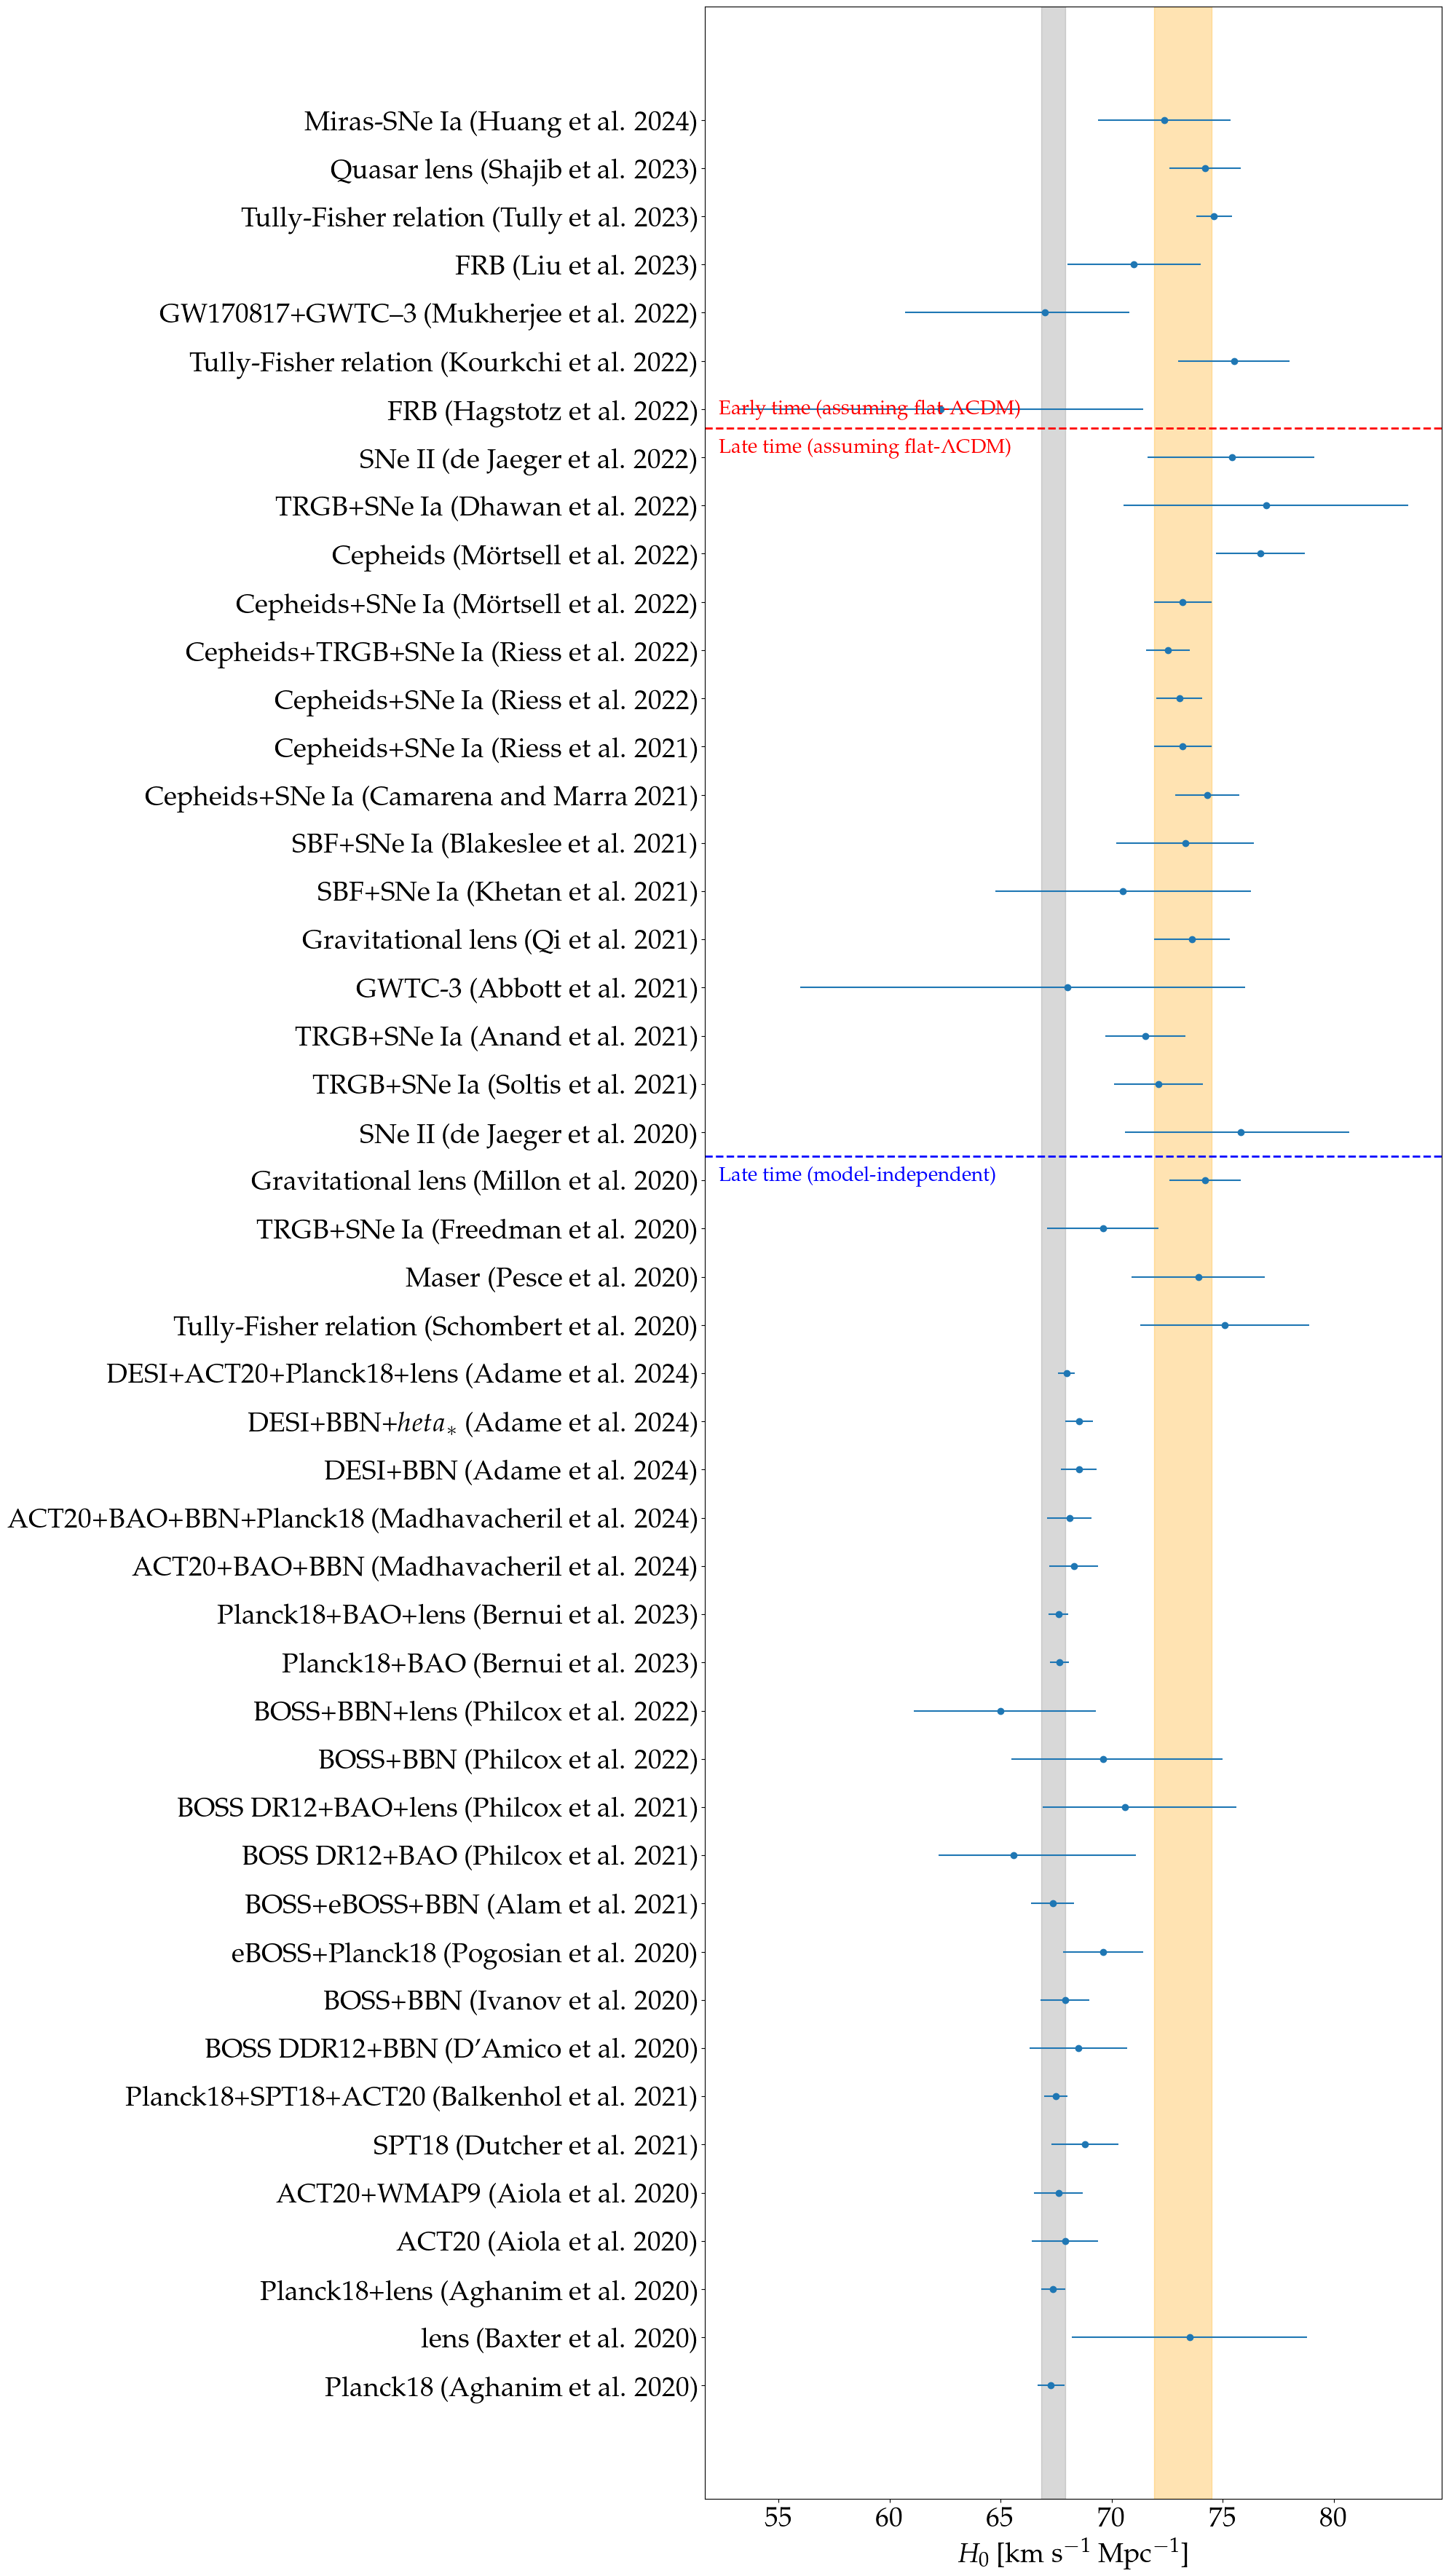

In [16]:
df["Y"]=df["Methods"]+" ("+df["Authors"]+" "+df["Year"].astype(str)+ ")"
#df = df.iloc[::-1]
plt.figure(figsize=(20,35))
plt.errorbar(df["$H_0$"],df["Y"],xerr=[df["+Erro"],df["-Erro"]],fmt="o")

x_min = 67.36- 0.54
x_max = 67.36+ 0.54
x_min_sn = 73.20- 1.30
x_max_sn = 73.20+ 1.30
y_position = 41 - 0.4
y_position2 = 26 - 0.5
# Desenhar a faixa
plt.ylim(plt.ylim()[0], plt.ylim()[1])
plt.fill_betweenx(y=plt.ylim(), x1=x_min, x2=x_max, color='gray', alpha=0.3)
plt.fill_betweenx(y=plt.ylim(), x1=x_min_sn, x2=x_max_sn, color='orange', alpha=0.3)
plt.axhline(y=y_position, color='r', linestyle='--', linewidth=2)  # Linha horizontal
plt.axhline(y=y_position2, color='b', linestyle='--', linewidth=2)  # Linha horizontal

plt.text(x_min - 14.5, y_position+ 0.3, 'Early time (assuming flat-$\Lambda$CDM)', fontsize=20, color='red')  # Text
plt.text(x_min - 14.5, y_position- 0.5, 'Late time (assuming flat-$\Lambda$CDM)', fontsize=20, color='red')  # Text
plt.text(x_min - 14.5, y_position2- 0.5, 'Late time (model-independent)', fontsize=20, color='blue')  # Text
plt.tick_params(axis='x', labelsize=27)
plt.tick_params(axis='y', labelsize=27)
plt.tight_layout()
plt.xlabel("$H_0$ [km s$^{-1}$ Mpc$^{-1}$]",fontsize=27)
plt.savefig("h0_methods.pdf",dpi=500, bbox_inches='tight')
plt.show()